In [2]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import qlearning as q 
from core import prices as pr 


In [3]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_delta.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.23913192, 0.31266443],
       [0.3087081 , 0.2484573 ],
       [0.28334074, 0.27727527],
       ...,
       [0.24753596, 0.24708838],
       [0.25414117, 0.25499754],
       [0.24757146, 0.24794193]]), array([[0.25009435, 0.29488213],
       [0.26275586, 0.27868287],
       [0.30005124, 0.23736586],
       ...,
       [0.25244979, 0.2483583 ],
       [0.24597621, 0.25291522],
       [0.26279214, 0.25966251]]), array([[0.26444771, 0.30818974],
       [0.25932822, 0.29348482],
       [0.26985776, 0.28398473],
       ...,
       [0.2560878 , 0.26667338],
       [0.25942496, 0.26903437],
       [0.26110184, 0.25957363]]), array([[0.31436124, 0.2791946 ],
       [0.26987695, 0.2676151 ],
       [0.28570168, 0.27958013],
       ...,
       [0.27817763, 0.24906342],
       [0.2679237 , 0.27414837],
       [0.26404111, 0.24804971]]), array([[0.27891218, 0.30843025],
       [0.25354334, 0.29740129],
       [0.29007484, 0.26798439],
       ...,
       [0.28962592, 0.26726511],
       

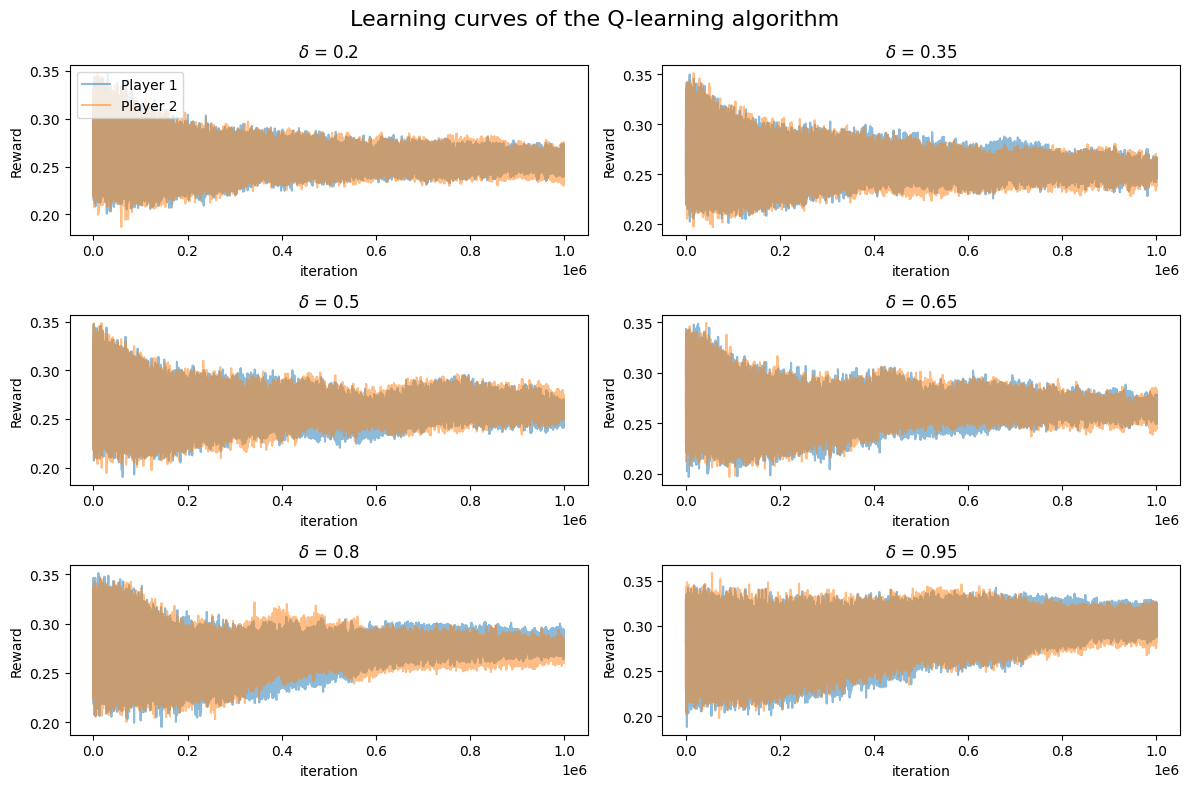

In [3]:
agg = np.array(aggregated_agents).mean(axis=1)
num_graphs = len(agg)
delta = [0.20, 0.35, 0.50, 0.65, 0.80, 0.95]

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(agg[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(agg[graph_num][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\delta$ = {delta[graph_num]}')
    
      # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend(loc='upper left') 

# Remove any unused subplots
if num_graphs < 4:
    for i in range(num_graphs, 4):
        fig.delaxes(axes[i])

# Create a legend in the first subplot
if graph_num == 0:
         # Legend in the top-left corner
        ax.spines['top'].set_visible(True)  # Show top spine
        ax.spines['right'].set_visible(True)  # Show right spine
        ax.spines['bottom'].set_visible(True)  # Show bottom spine
        ax.spines['left'].set_visible(True)  # Show left spine

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()


fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [4]:
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.28822612 0.28139021]
 [0.28299719 0.28311314]
 [0.29207011 0.34730365]
 [0.3759088  0.36000725]
 [0.4980077  0.43929978]
 [0.72043213 0.69046853]]


[0.28480817 0.28305517 0.31968688 0.36795803 0.46865374 0.70545033]


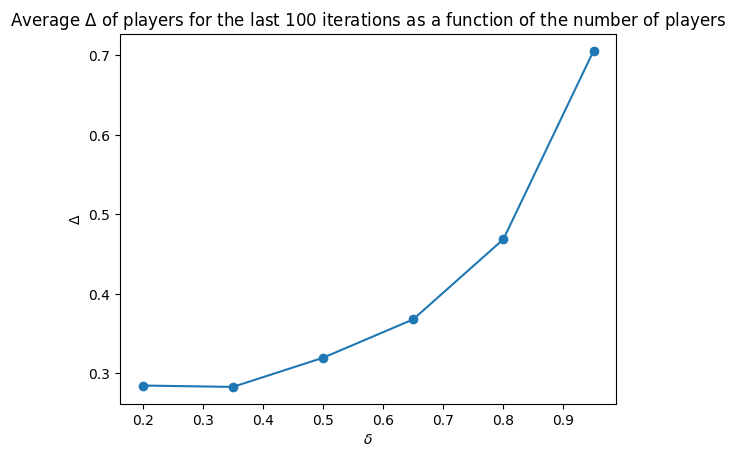

In [5]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot([0.20, 0.35, 0.50, 0.65, 0.80, 0.95],av, linestyle='-', marker='o')
plt.xlabel('$\\delta$')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations as a function of the number of players')
plt.show() #considerer les échatillons et faire une régression LOESS

## LOESS reg

In [13]:
len(aggregated_agents[0][0])

2

In [7]:
plot_pl1 = aggregated_agents[:-100]
print(plot_pl1)
plt.scatter([0.20, 0.35, 0.50, 0.65, 0.80, 0.95],plot_pl1)
plt.xlabel('$\\delta$')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations as a function of the number of players')
plt.show() #considerer les échatillons et faire une régression LOESS

TypeError: list indices must be integers or slices, not tuple